<a href="https://colab.research.google.com/github/Abhiroop17/Heart-Failure-Prediction-using-Neural-Networks/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Failure Prediction using Neural Networks**

# **Overview**
Heart failure is a critical medical condition that occurs when the heart cannot pump enough blood to meet the body’s needs. Early prediction of heart failure can significantly improve patient outcomes by enabling timely medical intervention. This project involves building a machine learning model to predict the likelihood of heart failure based on clinical data, such as patient demographics, laboratory results, and lifestyle factors.



# **Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# **Dataset Preprocessing**

In [ ]:
# Load the dataset
file_path = '/content/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display dataset information
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# **Dataset Description**
The dataset used for this project contains clinical records of patients, with the following key features:

Age: Age of the patient in years.

Anaemia: Whether the patient has a low red blood cell count (1 = Yes, 0 = No).

Creatinine Phosphokinase (CPK): Level of the CPK enzyme in the blood (mcg/L).

Diabetes: Whether the patient has diabetes (1 = Yes, 0 = No).

Ejection Fraction: Percentage of blood leaving the heart at each contraction (%).

High Blood Pressure: Presence of hypertension (1 = Yes, 0 = No).

Platelets: Platelet count in the blood (kiloplatelets/mL).

Serum Creatinine: Level of creatinine in the blood (mg/dL).

Serum Sodium: Level of sodium in the blood (mEq/L).

Sex: Gender of the patient (Male = 1, Female = 0).

Smoking: Whether the patient is a smoker (1 = Yes, 0 = No).

Time: Follow-up period (days).

Death Event: Target variable indicating if the patient died during follow-up (1 = Yes, 0 = No).


# **Separate features and target**

In [ ]:
X = data.drop('DEATH_EVENT', axis=1)  # Features
y = data['DEATH_EVENT']  # Target

# **Split into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Standardize the features**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Build the neural network model**

In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# **Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Train the model**

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.7298 - loss: 0.6003 - val_accuracy: 0.7083 - val_loss: 0.6146
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6986 - loss: 0.6007 - val_accuracy: 0.7083 - val_loss: 0.6079
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7117 - loss: 0.5949 - val_accuracy: 0.7292 - val_loss: 0.6007
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6934 - loss: 0.5689 - val_accuracy: 0.7083 - val_loss: 0.5931
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6385 - loss: 0.5892 - val_accuracy: 0.7292 - val_loss: 0.5846
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6852 - loss: 0.5783 - val_accuracy: 0.7292 - val_loss: 0.5759
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7568 - loss: 0.5539 - val_accuracy: 0.7083 - val_loss: 0.5692
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7184 - loss: 0.5876 - val_accuracy: 0.7083 - val_los

# **Evaluate the model on the test set**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Test Loss: 0.5092727541923523
Test Accuracy: 0.7833333611488342


# **Predict and evaluate**

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        41
           1       0.75      0.47      0.58        19

    accuracy                           0.78        60
   macro avg       0.77      0.70      0.72        60
weighted avg       0.78      0.78      0.77        60



# **Confusion Matrix**

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


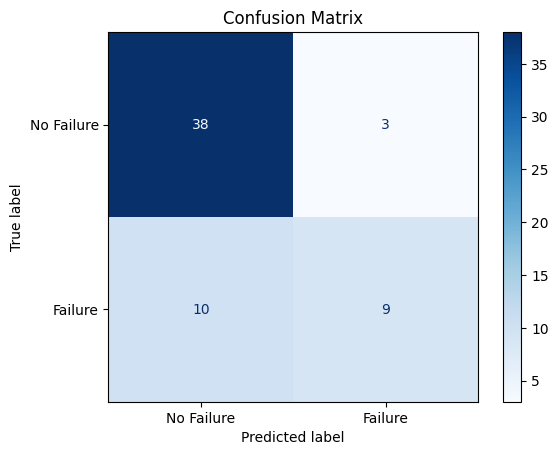

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Failure", "Failure"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **Key Challenges**
Balancing the dataset if there is a class imbalance (e.g., significantly more non-fatal cases than fatal ones).

Avoiding overfitting, especially when dealing with small datasets.

Interpreting clinical data to ensure predictions align with medical knowledge.

# **Conclusion**
The final model predicts whether a patient is at risk of heart failure, with high accuracy and reliability. It can be used by healthcare providers as a decision-support tool to prioritize patients for further tests or interventions.